<a href="https://colab.research.google.com/github/VitikaJain25/HealthCareNLPCourse/blob/main/CNN_ECG_Heart_Beat_Analysis_%26_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 D CNN - Signal Data (CSV)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Our train_data and test_data does not have header, so we will use header = None.
train_data = pd.read_csv("/content/drive/MyDrive/NLP Healthcare Course DataSets/ECG/mitbih_train.csv", header = None)
test_data = pd.read_csv("/content/drive/MyDrive/NLP Healthcare Course DataSets/ECG/mitbih_test.csv", header = None)

In [8]:
train_data

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [9]:
test_data

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


## EDA (Exploratory Data Analysis)

In [10]:
train_data.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

In [11]:
train_data.shape

(87554, 188)

In [12]:
# Classes of ECG Data
# Last column data
train_data.iloc[:, -1].unique()

# It is float type.

array([0., 1., 2., 3., 4.])

An Electro Cardio Gram (ECG) is simple test that can be used to check your heart rhythm and electrical activity.

Classes = [N:0, S:1, V:2, F:3, Q:4] N: Non-ectopic beats (Normal Beats), - S: Supraventricular ectopic beats , V - Ventricular ectopic beats, F - Fusion Beats , Q - Unknown Beats

In [13]:
# Typecast data to integer format - last column- May use 187 or -1 to point to last column.
# We cannot apply classification algorithm to float type. Hence we are converting to int.
train_data[187] = train_data[187].astype('int')
test_data[187] = test_data[187].astype('int')

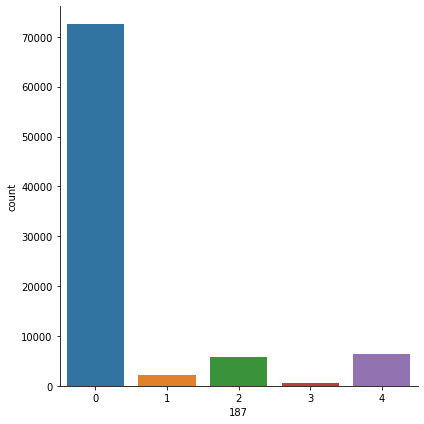

In [14]:
# Display Counts of classes
# This is an imbalanced Class
sns.catplot(x = 187, kind = 'count', data = train_data, height = 6)

In [16]:
train_data[187].value_counts()

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64

## ECG Heart Beat Visualization Plot

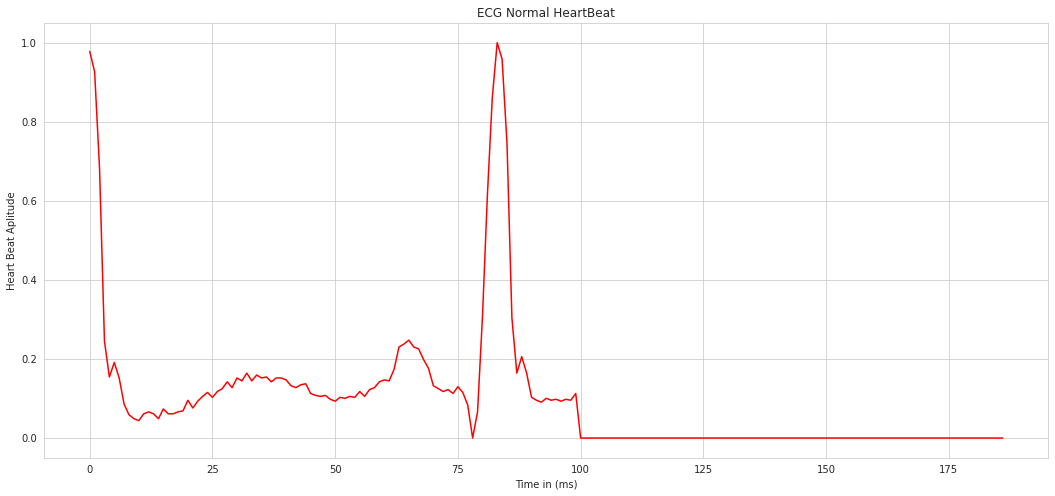

In [17]:
sns.set_style('whitegrid')
plt.figure(figsize = (18,8))
plt.plot(train_data.iloc[0,0:187], color = 'red')
plt.title('ECG Normal HeartBeat')
plt.xlabel('Time in (ms)')
plt.ylabel('Heart Beat Aplitude')
plt.show()

In [18]:
# Splitting Data into Various classes
# Used for plotting/visualizing for different classes.
# comparing all other types / classes of heart beat with class 0 or Normal Heart Beat.
df_1 = train_data[train_data[187] == 1]
df_2 = train_data[train_data[187] == 2]
df_3 = train_data[train_data[187] == 3]
df_4 = train_data[train_data[187] == 4]

### Comparing different classes of Heart Beat.

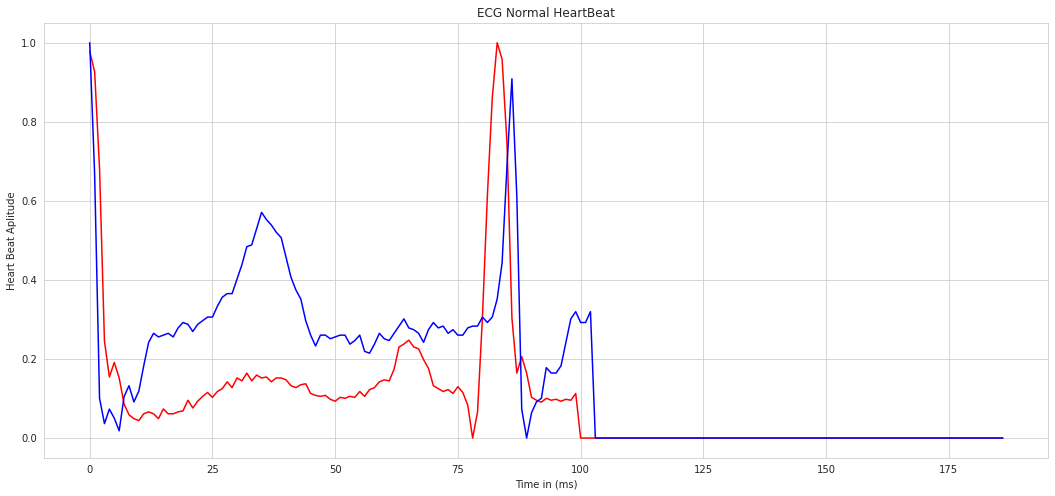

In [19]:
# Comparing df1

sns.set_style('whitegrid')
plt.figure(figsize = (18,8))
plt.plot(train_data.iloc[0,0:187], color = 'red', label = "Normal Heart Beat")
plt.plot(df_1.iloc[0,0:187], color = 'blue', label = "Supraventricular ectopic beats")
plt.title('ECG Normal HeartBeat')
plt.xlabel('Time in (ms)')
plt.ylabel('Heart Beat Aplitude')
plt.show()

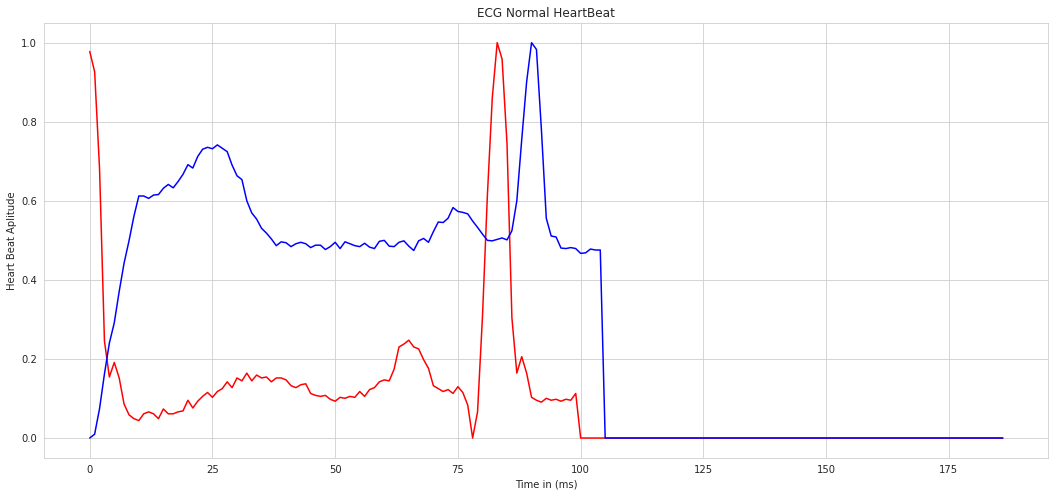

In [20]:
# Comparing df2

sns.set_style('whitegrid')
plt.figure(figsize = (18,8))
plt.plot(train_data.iloc[0,0:187], color = 'red', label = "Normal Heart Beat")
plt.plot(df_2.iloc[0,0:187], color = 'blue', label = "Ventricular ectopic beats")
plt.title('ECG Normal HeartBeat')
plt.xlabel('Time in (ms)')
plt.ylabel('Heart Beat Aplitude')
plt.show()

## Resample

Upsampling according to requirement.

0 will be down sampled.

1, 2, 3, 4 needs to be upsampled. As we have the following count:

0 - 72471

4 - 6431

2 - 5788

1 - 2223

3 - 641

In [21]:
from sklearn.utils import resample

# Upsample data for each class
df_1_upsample = resample(df_1, n_samples = 20000, replace = True, random_state = 123)
df_2_upsample = resample(df_2, n_samples = 20000, replace = True, random_state = 123)
df_3_upsample = resample(df_3, n_samples = 20000, replace = True, random_state = 123)
df_4_upsample = resample(df_4, n_samples = 20000, replace = True, random_state = 123)

In [22]:
# Randomly select 20000 samples for class = 0 (Downsampled)
df_0 = train_data[train_data[187] == 0].sample(n = 20000, random_state = 123)

In [25]:
# Concate all dataframes for each classes to create new train samples
train_df = pd.concat([df_0, df_1_upsample, df_2_upsample, df_3_upsample, df_4_upsample])

In [26]:
train_df[187].value_counts()

0    20000
1    20000
2    20000
3    20000
4    20000
Name: 187, dtype: int64

In [27]:
# Target Y

target_train = train_df[187]
target_test = test_data[187]

In [28]:
target_train

14967    0
71482    0
23543    0
9174     0
42319    0
        ..
86326    4
87200    4
83385    4
87507    4
82475    4
Name: 187, Length: 100000, dtype: int64

In [29]:
# convert integer classes into one-hot encoding
# 0 - [1, 0, 0, 0, 0]
# 3 - [0, 0, 0, 1, 0]
from keras.utils.np_utils import to_categorical
y_train = to_categorical(target_train)

In [30]:
y_train

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [31]:
y_test = to_categorical(target_test)

In [32]:
x_train = train_df.iloc[:,:-1]. values
x_test = train_df.iloc[:,:-1]. values

In [33]:
x_train.shape

(100000, 187)

In [34]:
# For Conv 1D dimentionality must be chnaged from (100000, 187) to (10000, 187, 1) where 187 = num of features, 1 - Dimentionality
x_train = x_train.reshape(len(x_train), x_train.shape[1], 1)
x_test = x_test.reshape(len(x_test), x_test.shape[1], 1)

In [35]:
x_train.shape

(100000, 187, 1)

In [37]:
# Data Preparation is done.
# This is important step as otherwise, CNN will not accept the input if not in this shape.

x_train

array([[[1.        ],
        [0.6477024 ],
        [0.03938731],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[1.        ],
        [0.94661921],
        [0.65124553],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[1.        ],
        [0.8559671 ],
        [0.30246913],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       ...,

       [[0.98465961],
        [0.93480343],
        [0.87535954],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.92543411],
        [0.87538302],
        [0.81205314],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.98628694],
        [0.93776369],
        [0.87341774],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]]])

## CNN 1D

In [40]:
from keras.models import Sequential
from keras.layers import Dense

from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten
from tensorflow.keras.optimizers import Adam

# Avoid Overfitting by using BatchNormalization
from tensorflow.keras.layers import BatchNormalization

In [41]:
def build_model():
  model = Sequential()

  # Filter = No. of Neurons
  # Padding = 'same' = zero padding, padding = 'valid' = valid padding
  model.add(Conv1D(filters = 64, kernel_size = 5, activation = 'relu', padding = 'same', input_shape = (187,1)))

  # BatchNormalization
  model.add(BatchNormalization())
  
  # Pooling
  model.add(MaxPooling1D(pool_size = (2), strides = (2), padding = 'same'))